In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [28]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
X = df.drop('DEATH_EVENT', axis=1)
y = df[['DEATH_EVENT']]

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   DEATH_EVENT  299 non-null    int64
dtypes: int64(1)
memory usage: 2.5 KB


In [4]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


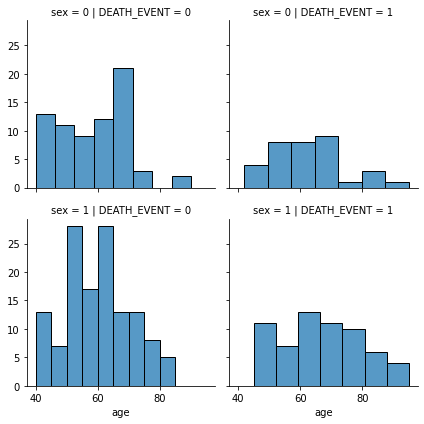

In [5]:
g = sns.FacetGrid(df, row='sex', col='DEATH_EVENT')
g.map(sns.histplot,"age")

In [11]:
numeric_features = ['creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']

In [16]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
    ]
)


In [17]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ]
)

In [19]:
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [32]:
X_train

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
134,81.0,0,4540,0,35,0,231000.0,1.18,137,1,1,107
145,50.0,0,185,0,30,0,266000.0,0.70,141,1,1,112
63,45.0,0,582,0,35,0,385000.0,1.00,145,1,0,61
292,52.0,0,190,1,38,0,382000.0,1.00,140,1,1,258
284,50.0,1,54,0,40,0,279000.0,0.80,141,1,0,250
...,...,...,...,...,...,...,...,...,...,...,...,...
251,55.0,0,572,1,35,0,231000.0,0.80,143,0,0,215
192,50.0,1,121,1,40,0,260000.0,0.70,130,1,0,175
117,85.0,1,102,0,60,0,507000.0,3.20,138,0,0,94
47,60.0,0,582,1,38,1,451000.0,0.60,138,1,1,40


In [33]:
clf.fit(X_train, y_train)

C:\Users\michael.kean\.virtualenvs\test-KsxmWhQY\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['creatinine_phosphokinase',
                                                   'ejection_fraction',
                                                   'platelets',
                                                   'serum_creatinine',
                                                   'serum_sodium'])])),
                ('classifier', LogisticRegression())])

In [35]:
print(f"Model Score: {clf.score(X_test, y_test)}")

Model Score: 0.7333333333333333


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
134,81.0,0,4540,0,35,0,231000.0,1.18,137,1,1,107
145,50.0,0,185,0,30,0,266000.0,0.70,141,1,1,112
63,45.0,0,582,0,35,0,385000.0,1.00,145,1,0,61
292,52.0,0,190,1,38,0,382000.0,1.00,140,1,1,258
284,50.0,1,54,0,40,0,279000.0,0.80,141,1,0,250
...,...,...,...,...,...,...,...,...,...,...,...,...
251,55.0,0,572,1,35,0,231000.0,0.80,143,0,0,215
192,50.0,1,121,1,40,0,260000.0,0.70,130,1,0,175
117,85.0,1,102,0,60,0,507000.0,3.20,138,0,0,94
47,60.0,0,582,1,38,1,451000.0,0.60,138,1,1,40
